In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
DATA_DIR = (Path.cwd() / ".." / "Data").resolve()

In [3]:
assert (DATA_DIR / "CH 2020-2021.csv").exists()
assert (DATA_DIR / "metervalues_pseudonymized_1_neu.csv").exists()
assert (DATA_DIR / "metervalues_pseudonymized_2_neu.csv").exists()

In [4]:
carbon = pd.DataFrame(pd.read_csv(DATA_DIR / "CH 2020-2021.csv"))
mvs_1 = pd.DataFrame(pd.read_csv(DATA_DIR / "metervalues_pseudonymized_1_neu.csv", delimiter=';', low_memory=False))
mvs_2 = pd.DataFrame(pd.read_csv(DATA_DIR / "metervalues_pseudonymized_2_neu.csv", delimiter=';', low_memory=False))

In [5]:
carbon.head()

,datetime,created_at,updated_at,timestamp,zone_name,carbon_intensity_avg,carbon_intensity_production_avg,carbon_intensity_discharge_avg,carbon_intensity_import_avg,carbon_rate_avg,...,latest_forecasted_precipitation_avg,latest_forecasted_price_avg,latest_forecasted_production_avg,latest_forecasted_consumption_avg,latest_forecasted_power_net_import_AT_avg,latest_forecasted_power_net_import_DE_avg,latest_forecasted_power_net_import_FR_avg,latest_forecasted_power_net_import_IT-NO_avg,latest_forecasted_production_solar_avg,latest_forecasted_production_wind_avg
0,2020-01-01T00:00:00+00:00,2021-06-17T10:00:22.629569+00:00,2021-06-17T10:00:22.629569+00:00,1577836800,CH,115.53,42.25,87.03,239.46,NaN,...,0.0,34.04,3562,7015,406.0,-239.0,2480.0,-1574.0,NaN,NaN
1,2020-01-01T01:00:00+00:00,2021-06-17T10:00:22.629569+00:00,2021-06-17T10:00:22.629569+00:00,1577840400,CH,113.57,46.79,87.03,255.94,NaN,...,0.0,31.52,3547,6994,364.0,-300.0,2416.0,-1540.0,NaN,NaN
2,2020-01-01T02:00:00+00:00,2021-06-17T10:00:22.629569+00:00,2021-06-17T10:00:22.629569+00:00,1577844000,CH,113.70,30.13,87.03,235.80,NaN,...,0.0,28.29,3384,6934,293.0,197.0,2303.0,-1073.0,NaN,NaN
3,2020-01-01T03:00:00+00:00,2021-06-17T10:00:22.629569+00:00,2021-06-17T10:00:22.629569+00:00,1577847600,CH,110.52,48.75,87.03,231.63,NaN,...,0.0,26.92,3367,7102,250.0,-146.0,2354.0,-934.0,NaN,NaN
4,2020-01-01T04:00:00+00:00,2021-06-17T10:00:22.629569+00:00,2021-06-17T10:00:22.629569+00:00,1577851200,CH,111.10,41.83,87.03,240.52,NaN,...,0.0,26.96,3367,7239,292.0,-426.0,2496.0,-889.0,NaN,NaN


In [6]:
mvs_1.head()

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp
0,1057264,1.0,1,2188,155260,920,01.01.2021 00:15
1,978733,2.0,1,2190,2213880,0,01.01.2021 00:15
2,978738,3.0,1,2195,3081670,0,01.01.2021 00:15
3,978742,4.0,1,2194,1463670,0,01.01.2021 00:15
4,978746,5.0,1,1923,1836900,0,01.01.2021 00:15


In [7]:
mvs_2.head()

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp
0,350030,173.0,382dee95-d845-407c-b372-8705711727a2,0e22a526-ef4e-44fe-9396-117e406dd251,1317710,0,01.07.2020 00:15
1,350034,184.0,cb47699d-69e3-4cc8-8b4f-7f52c3a3e67c,a5f6f964-9709-4772-b711-746e507b6fbf,3507640,0,01.07.2020 00:15
2,350038,172.0,25fde958-fc63-4d7a-a773-6023f2a58291,c3e9c167-010a-4c78-a5a6-9c29bd89bb7f,2368810,0,01.07.2020 00:15
3,350042,186.0,265e809d-dd6b-4f29-b462-76d36ea14fac,1521b801-4741-4f5a-a893-f584da4dc976,671020,0,01.07.2020 00:15
4,350048,206.0,98611070-1fbd-47af-9119-e80fa90bb260,57a6ceec-c875-4043-9fb8-f06e6356fb6f,241430,0,01.07.2020 00:15


In [8]:
mvs = pd.concat([mvs_1, mvs_2], ignore_index=True)
mvs.head()

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp
0,1057264,1.0,1,2188,155260,920,01.01.2021 00:15
1,978733,2.0,1,2190,2213880,0,01.01.2021 00:15
2,978738,3.0,1,2195,3081670,0,01.01.2021 00:15
3,978742,4.0,1,2194,1463670,0,01.01.2021 00:15
4,978746,5.0,1,1923,1836900,0,01.01.2021 00:15


In [9]:
df = mvs.astype({"Chargepoint": str, "connector": str})

In [10]:
df['unique_charge_point'] = df['Chargepoint'] + df['connector']
df.head()

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp,unique_charge_point
0,1057264,1.0,1,2188,155260,920,01.01.2021 00:15,1.01
1,978733,2.0,1,2190,2213880,0,01.01.2021 00:15,2.01
2,978738,3.0,1,2195,3081670,0,01.01.2021 00:15,3.01
3,978742,4.0,1,2194,1463670,0,01.01.2021 00:15,4.01
4,978746,5.0,1,1923,1836900,0,01.01.2021 00:15,5.01


In [11]:
df['unique_charge_point'].nunique()

244

In [12]:
df['increment'].dtype

dtype('O')

In [35]:
df['increment'] = pd.to_numeric(df['increment'])

ValueError: Unable to parse string "increment" at position 696713

In [13]:
df[696713:696715]

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp,unique_charge_point
696713,id,nan,connector,charge_log_id,metervalue,increment,timestamp,nanconnector
696714,80169,171.0,178d3d4a-065b-4c88-9e1e-a10270de3f44,e978caff-2a56-46c0-acd0-b09b54a8ff82,345800,0,01.01.2020 00:15,171.0178d3d4a-065b-4c88-9e1e-a10270de3f44


In [14]:
df

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp,unique_charge_point
0,1057264,1.0,1,2188,155260,920,01.01.2021 00:15,1.01
1,978733,2.0,1,2190,2213880,0,01.01.2021 00:15,2.01
2,978738,3.0,1,2195,3081670,0,01.01.2021 00:15,3.01
3,978742,4.0,1,2194,1463670,0,01.01.2021 00:15,4.01
4,978746,5.0,1,1923,1836900,0,01.01.2021 00:15,5.01
...,...,...,...,...,...,...,...,...
1175101,978722,25.0,1,2201,478370,0,01.01.2021 00:00,25.01
1175102,978724,26.0,1,1965,252472,0,01.01.2021 00:00,26.01
1175103,978728,28.0,1,2199,332544,1173,01.01.2021 00:00,28.01
1175104,982914,29.0,1,2197,805520,0,01.01.2021 00:00,29.01


In [15]:
df = df.drop(696713)

In [16]:
df['increment'] = pd.to_numeric(df['increment'])

In [17]:
df['increment'].dtype

dtype('int64')

In [18]:
df[696713:696715]

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp,unique_charge_point
696714,80169,171.0,178d3d4a-065b-4c88-9e1e-a10270de3f44,e978caff-2a56-46c0-acd0-b09b54a8ff82,345800,0,01.01.2020 00:15,171.0178d3d4a-065b-4c88-9e1e-a10270de3f44
696715,78227,172.0,25fde958-fc63-4d7a-a773-6023f2a58291,5236702e-a0cd-472f-987a-63418ba711dc,1438400,0,01.01.2020 00:15,172.025fde958-fc63-4d7a-a773-6023f2a58291


In [19]:
df['increment'] > 5500

0          False
1          False
2          False
3          False
4          False
           ...  
1175101    False
1175102    False
1175103    False
1175104    False
1175105    False
Name: increment, Length: 1175105, dtype: bool

In [20]:
l = df[df['increment'] > 5500]

In [21]:
l['charge_log_id'].nunique

<bound method IndexOpsMixin.nunique of 4203       2229
14669      2412
17644      2485
23373      2589
24182      2611
           ... 
1078105     499
1089197     672
1166768    2047
1171519    2121
1173827    2169
Name: charge_log_id, Length: 417, dtype: object>

In [22]:
l_list = l['charge_log_id'].tolist()
l_list

['2229',
 '2412',
 '2485',
 '2589',
 '2611',
 '2735',
 '2823',
 '2823',
 '2877',
 '2827',
 '2900',
 '2926',
 '2919',
 '2950',
 '2992',
 '3002',
 '3033',
 '3129',
 '3159',
 '3289',
 '3348',
 '3406',
 '3523',
 '3573',
 '3623',
 '3699',
 '3724',
 '3760',
 '3823',
 '3888',
 '3913',
 '3985',
 '4038',
 '4101',
 '4136',
 '4260',
 '4331',
 '4420',
 '4514',
 '4561',
 '4683',
 '4678',
 '4725',
 '4894',
 '4961',
 '5041',
 '5138',
 '5268',
 '5324',
 '5380',
 '5456',
 '5567',
 '5639',
 '5685',
 '5775',
 '5943',
 '6019',
 '6191',
 '6230',
 '6287',
 '6299',
 '6298',
 '6467',
 '6497',
 '6497',
 '6514',
 '6507',
 '6581',
 '6662',
 '6697',
 '6743',
 '6770',
 '6749',
 '6892',
 '6938',
 '6940',
 '7017',
 '7093',
 '7081',
 '7175',
 '7244',
 '7265',
 '7261',
 '7301',
 '7305',
 '7320',
 '7388',
 '7444',
 '7465',
 '7472',
 '7510',
 '7563',
 '7615',
 '7575',
 '7680',
 '7687',
 '7790',
 '7770',
 '7829',
 '7897',
 '7908',
 '7894',
 '7972',
 '7974',
 '8008',
 '8032',
 '8086',
 '8088',
 '8165',
 '8181',
 '8214',
 

In [23]:
df_new = df[~df['charge_log_id'].isin(l_list)]

In [24]:
df_new.head()

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp,unique_charge_point
0,1057264,1.0,1,2188,155260,920,01.01.2021 00:15,1.01
1,978733,2.0,1,2190,2213880,0,01.01.2021 00:15,2.01
2,978738,3.0,1,2195,3081670,0,01.01.2021 00:15,3.01
3,978742,4.0,1,2194,1463670,0,01.01.2021 00:15,4.01
4,978746,5.0,1,1923,1836900,0,01.01.2021 00:15,5.01


In [25]:
df_new

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp,unique_charge_point
0,1057264,1.0,1,2188,155260,920,01.01.2021 00:15,1.01
1,978733,2.0,1,2190,2213880,0,01.01.2021 00:15,2.01
2,978738,3.0,1,2195,3081670,0,01.01.2021 00:15,3.01
3,978742,4.0,1,2194,1463670,0,01.01.2021 00:15,4.01
4,978746,5.0,1,1923,1836900,0,01.01.2021 00:15,5.01
...,...,...,...,...,...,...,...,...
1175101,978722,25.0,1,2201,478370,0,01.01.2021 00:00,25.01
1175102,978724,26.0,1,1965,252472,0,01.01.2021 00:00,26.01
1175103,978728,28.0,1,2199,332544,1173,01.01.2021 00:00,28.01
1175104,982914,29.0,1,2197,805520,0,01.01.2021 00:00,29.01


In [27]:
df_new[df_new['increment'] > 5500]

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp,unique_charge_point


In [37]:
df_new

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp,unique_charge_point
0,1057264,1.0,1,2188,155260,920,01.01.2021 00:15,1.01
1,978733,2.0,1,2190,2213880,0,01.01.2021 00:15,2.01
2,978738,3.0,1,2195,3081670,0,01.01.2021 00:15,3.01
3,978742,4.0,1,2194,1463670,0,01.01.2021 00:15,4.01
4,978746,5.0,1,1923,1836900,0,01.01.2021 00:15,5.01
...,...,...,...,...,...,...,...,...
1175101,978722,25.0,1,2201,478370,0,01.01.2021 00:00,25.01
1175102,978724,26.0,1,1965,252472,0,01.01.2021 00:00,26.01
1175103,978728,28.0,1,2199,332544,1173,01.01.2021 00:00,28.01
1175104,982914,29.0,1,2197,805520,0,01.01.2021 00:00,29.01


In [36]:
df_new.loc[df_new['charge_log_id'] == '2188']

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp,unique_charge_point
0,1057264,1.0,1,2188,155260,920,01.01.2021 00:15,1.01
58,1057262,1.0,1,2188,155760,500,01.01.2021 00:30,1.01
59,1057260,1.0,1,2188,155760,0,01.01.2021 00:45,1.01
116,1057258,1.0,1,2188,155760,0,01.01.2021 01:00,1.01
117,1057256,1.0,1,2188,155760,0,01.01.2021 01:15,1.01
...,...,...,...,...,...,...,...,...
1174995,1057274,1.0,1,2188,150680,910,31.12.2020 23:00,1.01
1174996,1057272,1.0,1,2188,151590,910,31.12.2020 23:15,1.01
1175049,1057270,1.0,1,2188,152510,920,31.12.2020 23:30,1.01
1175050,1057268,1.0,1,2188,153420,910,31.12.2020 23:45,1.01


In [44]:
from datetime import datetime
datetime_object = datetime.strptime('01.01.2021 00:15', '%d.%m.%Y %H:%M')
datetime_object.timestamp()

1609456500.0

In [48]:
df_new['n_timestamp'] = df_new.apply(lambda t: datetime.strptime(t['timestamp'], '%d.%m.%Y %H:%M').timestamp(), axis=1)

<ipython-input-48-6e34fcacae02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['n_timestamp'] = df_new.apply(lambda t: datetime.strptime(t['timestamp'], '%d.%m.%Y %H:%M').timestamp(), axis=1)


In [52]:
df_sorted = df_new.sort_values('n_timestamp')
df_sorted.head()

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp,unique_charge_point,n_timestamp
696714,80169,171.0,178d3d4a-065b-4c88-9e1e-a10270de3f44,e978caff-2a56-46c0-acd0-b09b54a8ff82,345800,0,01.01.2020 00:15,171.0178d3d4a-065b-4c88-9e1e-a10270de3f44,1.577834e+09
696715,78227,172.0,25fde958-fc63-4d7a-a773-6023f2a58291,5236702e-a0cd-472f-987a-63418ba711dc,1438400,0,01.01.2020 00:15,172.025fde958-fc63-4d7a-a773-6023f2a58291,1.577834e+09
696716,31073,173.0,382dee95-d845-407c-b372-8705711727a2,117fe761-2222-40a1-96bd-ea522360d7ce,517050,0,01.01.2020 00:15,173.0382dee95-d845-407c-b372-8705711727a2,1.577834e+09
696718,4333,174.0,3e77b1c0-8a23-4624-993e-77a914198cd7,24aaf8b7-f58c-453e-a948-bc6f7829c9e2,2551993,0,01.01.2020 00:15,174.03e77b1c0-8a23-4624-993e-77a914198cd7,1.577834e+09
696719,55377,175.0,24d53420-ba27-45c5-a585-c74243a50baa,df3ff415-56fb-40ab-b0ee-270a8415ad3a,254570,0,01.01.2020 00:15,175.024d53420-ba27-45c5-a585-c74243a50baa,1.577834e+09


In [85]:
#Warning! Very slow (sorry but I wasn't bothered to make it fast)

charge_ids = list(set(df_sorted['charge_log_id']))
dataframes = {}
for charge_id in charge_ids:
    df_charges = df_sorted.loc[df_sorted['charge_log_id'] == charge_id]
    dataframes[charge_id] = df_charges

In [60]:
dataframes

{'12431':              id Chargepoint connector charge_log_id metervalue  increment  \
 524669  1889267       101.0         1         12431     573539          0   
 524708  1889266       101.0         1         12431     574638       1099   
 524746  1889265       101.0         1         12431     575960       1322   
 524783  1889264       101.0         1         12431     577014       1054   
 524822  1889263       101.0         1         12431     577014          0   
 
                timestamp unique_charge_point   n_timestamp  
 524669  18.06.2021 16:30              101.01  1.624027e+09  
 524708  18.06.2021 16:58              101.01  1.624028e+09  
 524746  18.06.2021 17:13              101.01  1.624029e+09  
 524783  18.06.2021 17:28              101.01  1.624030e+09  
 524822  18.06.2021 17:45              101.01  1.624031e+09  }

<AxesSubplot:ylabel='Count'>

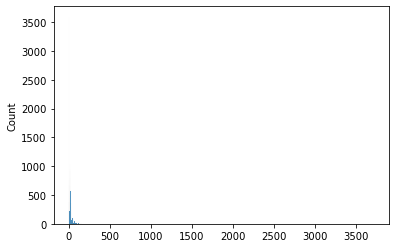

In [86]:
times = []

for i in charge_ids:
    times.append((dataframes[i]['n_timestamp'].max() - dataframes[i]['n_timestamp'].min())/ 3600)
    
import seaborn as sns
sns.histplot(times)

In [99]:
to_drop = {}

for (c_id, df) in dataframes.items():
    powers = df['increment']
    starting_valley = True
    second_valley = False
    for inc in powers:
        if starting_valley and inc >= 25:
            starting_valley = False
            continue
        if not starting_valley and inc == 0:
            second_valley = True
            continue
        if second_valley and inc >= 25:
            to_drop[c_id] = df
            break
        
        
        
print(len(to_drop))
len(dataframes)

2848


15915

In [110]:
len([val for val in to_drop.values() if val['increment'].iloc[-1] >= 25])

734

In [117]:
df_sorted.loc[~df_sorted['charge_log_id'].isin(to_drop.keys())].to_csv(DATA_DIR / "seperated_meter_data.csv")